In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BC_pop = pd.read_csv('Population/BCPop1990.csv')#, index_col=0) # only need index_col=0 to make years the indices
print(BC_pop.columns)
WA_pop = pd.read_csv('Population/WAPop1990.csv')# index_col=0)
print(WA_pop.columns)

Index(['Unnamed: 0', 'Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital',
       'Cariboo', 'Central Coast', 'Central Kootenay', 'Central Okanagan',
       'Columbia-Shuswap', 'Comox Valley', 'Cowichan Valley', 'East Kootenay',
       'Fraser Valley', 'Fraser-Fort George', 'Greater Vancouver',
       'Kitimat-Stikine', 'Kootenay Boundary', 'Mount Waddington', 'Nanaimo',
       'North Coast', 'North Okanagan', 'Northern Rockies',
       'Okanagan-Similkameen', 'Peace River', 'Powell River',
       'Squamish-Lillooet', 'Stikine', 'Strathcona', 'Sunshine Coast',
       'Thompson-Nicola'],
      dtype='object')
Index(['Unnamed: 0', 'Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark',
       'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield',
       'Grant', 'Grays Harbor', 'Island', 'Jefferson', 'King', 'Kitsap',
       'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan',
       'Pacific', 'Pend Oreille', 'Pierce', 'San Juan', 'Skagit', 'Skamania',
       'S

In [3]:
BC_pop.index

RangeIndex(start=0, stop=25, step=1)

In [4]:
BC_pop = BC_pop.rename(columns={'Unnamed: 0':'Year'})
WA_pop = WA_pop.rename(columns={'Unnamed: 0':'Year'})

print(BC_pop['Year']) #there's a duplicate row at 2011!

0     1991
1     1996
2     2001
3     2002
4     2003
5     2004
6     2005
7     2006
8     2007
9     2008
10    2009
11    2010
12    2011
13    2011
14    2012
15    2013
16    2014
17    2015
18    2016
19    2017
20    2018
21    2019
22    2020
23    2021
24    2022
Name: Year, dtype: int64


In [5]:
BC_pop = BC_pop.drop_duplicates()

In [6]:
missing_yrs = np.setdiff1d([i for i in range(1990,2001)],[1991,1996])
missing_yrs

array([1990, 1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000])

In [7]:
missing_yrs_vals = np.empty((29,9,))*np.nan
missing_yrs_vals

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, 

In [8]:
missing_data = np.vstack((missing_yrs,missing_yrs_vals)).transpose()
missing_data

array([[1990.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [1992.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [1993.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [1994.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [1995.,   nan,   nan,

In [9]:
#BC_missing = pd.DataFrame((np.empty((9,29,))*np.nan).transpose(), 
#             columns=np.setdiff1d([i for i in range(1990,2001)],[1991,1996])).transpose()

BC_missing = pd.DataFrame(missing_data)
BC_missing.columns = BC_pop.columns
BC_missing

,Year,Alberni-Clayoquot,Bulkley-Nechako,Capital,Cariboo,Central Coast,Central Kootenay,Central Okanagan,Columbia-Shuswap,Comox Valley,...,North Okanagan,Northern Rockies,Okanagan-Similkameen,Peace River,Powell River,Squamish-Lillooet,Stikine,Strathcona,Sunshine Coast,Thompson-Nicola
0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#BC_pop = pd.concat([BC_missing,BC_pop]).sort_index() # this is for using year as indices
#print(BC_pop)

BC_pop = pd.concat([BC_missing,BC_pop]).sort_values(by='Year')

In [11]:
BC_pop.head()

,Year,Alberni-Clayoquot,Bulkley-Nechako,Capital,Cariboo,Central Coast,Central Kootenay,Central Okanagan,Columbia-Shuswap,Comox Valley,...,North Okanagan,Northern Rockies,Okanagan-Similkameen,Peace River,Powell River,Squamish-Lillooet,Stikine,Strathcona,Sunshine Coast,Thompson-Nicola
0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1991.0,31758.372339,40364.533248,284814.218429,57925.397683,NaN,52077.461519,99301.165353,44098.152246,36419.221742,...,56876.430083,5017.717949,68207.220822,57537.206555,20096.767171,23106.7448,NaN,33658.076917,20250.746172,104771.145103
1,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# don't need this
BC_pop['Year'] = BC_pop['Year'].astype(int)

In [12]:
BC_pop = BC_pop.interpolate() # fill in the missing years with some linearly interpolated values where possible

In [13]:
BC_pop

,Year,Alberni-Clayoquot,Bulkley-Nechako,Capital,Cariboo,Central Coast,Central Kootenay,Central Okanagan,Columbia-Shuswap,Comox Valley,...,North Okanagan,Northern Rockies,Okanagan-Similkameen,Peace River,Powell River,Squamish-Lillooet,Stikine,Strathcona,Sunshine Coast,Thompson-Nicola
0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1991.0,31758.372339,40364.533248,284814.218429,57925.397683,NaN,52077.461519,99301.165353,44098.152246,36419.221742,...,56876.430083,5017.717949,68207.220822,57537.206555,20096.767171,23106.744800,NaN,33658.076917,20250.746172,104771.145103
1,1992.0,31817.069866,40902.340312,291593.699934,58129.540054,NaN,53239.867915,105194.534266,45262.102554,39325.187575,...,59967.745405,5175.214143,70073.829608,57759.080778,20140.082503,24498.509171,NaN,35671.642446,21044.069864,107731.068164
2,1993.0,31875.767393,41440.147376,298373.181439,58333.682424,NaN,54402.274311,111087.903180,46426.052863,42231.153408,...,63059.060727,5332.710337,71940.438395,57980.955001,20183.397836,25890.273542,NaN,37685.207975,21837.393556,110690.991225
3,1994.0,31934.464920,41977.954439,305152.662944,58537.824795,NaN,55564.680707,116981.272094,47590.003172,45137.119242,...,66150.376049,5490.206532,73807.047181,58202.829224,20226.713168,27282.037913,NaN,39698.773503,22630.717248,113650.914286
4,1995.0,31993.162447,42515.761503,311932.144448,58741.967166,NaN,56727.087103,122874.641008,48753.953480,48043.085075,...,69241.691371,5647.702726,75673.655968,58424.703446,20270.028500,28673.802284,NaN,41712.339032,23424.040940,116610.837348
1,1996.0,32051.859975,43053.568567,318711.625953,58946.109536,NaN,57889.493499,128768.009922,49917.903789,50949.050908,...,72333.006692,5805.198920,77540.264755,58646.577669,20313.343832,30065.566655,NaN,43725.904561,24217.364632,119570.760409
5,1997.0,31963.087980,42941.454854,322969.700762,60802.087629,NaN,58184.794799,133853.607937,49973.923031,52270.640727,...,73133.205354,5841.159136,78016.011804,58400.062135,20365.475066,30943.253324,NaN,43505.123649,24711.291706,120523.608327
6,1998.0,31874.315985,42829.341140,327227.775572,62658.065722,NaN,58480.096099,138939.205953,50029.942273,53592.230545,...,73933.404015,5877.119352,78491.758853,58153.546602,20417.606299,31820.939993,NaN,43284.342737,25205.218779,121476.456245
7,1999.0,31785.543990,42717.227427,331485.850381,64514.043815,NaN,58775.397400,144024.803969,50085.961516,54913.820363,...,74733.602677,5913.079568,78967.505902,57907.031068,20469.737533,32698.626662,NaN,43063.561824,25699.145853,122429.304164


In [14]:
Sal_viab = pd.read_excel('../Ian-Paper1/Perry et al 2021 PLoS ONE S2_Table.xlsx', sheet_name=5)

In [15]:
Sal_viab = Sal_viab.rename(columns={'Ocean Entry Year':'Year'})

In [32]:
# optional
# in case we want to do a shift to compare salmon viability for a given ocean entry year against other nearby years' data
shift = 0 # could set to 1 or 2?
Sal_viab['Year'] = Sal_viab['Year'] + shift
Sal_viab = Sal_viab.set_index(['Year'])

In [16]:
Sal_viab

,Year,Cowichan Chinook,Harrison Chinook,Puntledge Chinook,Big Qualicum Coho
0,1990,0.063710,0.072071,0.006750,0.061526
1,1991,0.068293,0.021953,0.002300,0.058536
2,1992,0.027185,0.004026,0.001064,0.066708
3,1993,0.025604,0.006471,0.000915,0.068536
4,1994,0.017956,0.020456,0.003553,0.029363
5,1995,0.017425,0.037811,0.001853,0.015976
6,1996,0.008811,0.010038,NaN,0.014246
7,1997,0.008294,0.023246,0.004286,0.004293
8,1998,0.010999,0.008297,0.017847,0.013055
9,1999,0.012922,0.009150,0.010559,0.012809


In [52]:
# one of Roy's functions; not using it atm

def normalize_arr(arr):
    mean = np.nanmean(arr)
    std = np.nanstd(arr)
    nrm = (arr-mean)/std
    return nrm
    

In [17]:
#for RD in BC_pop.columns:
#    print(normalize_arr(BC_pop[RD]))

# naive normalization by hand;  annoyingly 'Year' gets normalized too
BC_pop_nrm = (BC_pop-np.nanmean(BC_pop,axis = 0))/np.nanstd(BC_pop,axis = 0)
WA_pop_nrm = (WA_pop-np.nanmean(WA_pop,axis = 0))/np.nanstd(WA_pop,axis = 0)
Sal_viab_nrm = (Sal_viab-np.nanmean(Sal_viab,axis = 0))/np.nanstd(Sal_viab,axis = 0)

In [18]:
BC_pop_nrm = BC_pop_nrm.reset_index().drop(columns=['index'])

In [19]:
BC_pop_nrm

,Year,Alberni-Clayoquot,Bulkley-Nechako,Capital,Cariboo,Central Coast,Central Kootenay,Central Okanagan,Columbia-Shuswap,Comox Valley,...,North Okanagan,Northern Rockies,Okanagan-Similkameen,Peace River,Powell River,Squamish-Lillooet,Stikine,Strathcona,Sunshine Coast,Thompson-Nicola
0,-1.680336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.575315,-0.331918,-0.226151,-1.799184,-2.020052,NaN,-2.356439,-1.886199,-2.256495,-2.351402,...,-2.415120,-1.587925,-2.350164,-1.068097,-0.796057,-1.947290,NaN,-2.766698,-2.225326,-2.060630
2,-1.470294,-0.265562,0.196326,-1.635074,-1.944612,NaN,-1.961870,-1.726134,-1.893677,-2.061713,...,-2.080656,-1.247420,-2.012473,-1.006917,-0.694064,-1.758011,NaN,-2.213953,-1.988049,-1.801573
3,-1.365273,-0.199206,0.618803,-1.470965,-1.869173,NaN,-1.567300,-1.566068,-1.530860,-1.772023,...,-1.746191,-0.906915,-1.674782,-0.945738,-0.592071,-1.568731,NaN,-1.661209,-1.750772,-1.542516
4,-1.260252,-0.132850,1.041280,-1.306856,-1.793733,NaN,-1.172731,-1.406002,-1.168042,-1.482334,...,-1.411727,-0.566410,-1.337091,-0.884558,-0.490078,-1.379452,NaN,-1.108464,-1.513494,-1.283458
5,-1.155231,-0.066494,1.463757,-1.142747,-1.718294,NaN,-0.778161,-1.245937,-0.805225,-1.192644,...,-1.077263,-0.225905,-0.999400,-0.823378,-0.388085,-1.190172,NaN,-0.555720,-1.276217,-1.024401
6,-1.050210,-0.000138,1.886235,-0.978638,-1.642855,NaN,-0.383591,-1.085871,-0.442408,-0.902955,...,-0.742798,0.114600,-0.661709,-0.762199,-0.286093,-1.000893,NaN,-0.002975,-1.038940,-0.765344
7,-0.945189,-0.100492,1.798163,-0.875564,-0.956990,NaN,-0.283354,-0.947744,-0.424946,-0.771208,...,-0.656221,0.192346,-0.575641,-0.830173,-0.163341,-0.881528,NaN,-0.063582,-0.891210,-0.681949
8,-0.840168,-0.200847,1.710092,-0.772489,-0.271125,NaN,-0.183116,-0.809618,-0.407484,-0.639462,...,-0.569644,0.270091,-0.489573,-0.898147,-0.040590,-0.762163,NaN,-0.124188,-0.743480,-0.598554
9,-0.735147,-0.301201,1.622020,-0.669415,0.414739,NaN,-0.082878,-0.671492,-0.390022,-0.507715,...,-0.483066,0.347837,-0.403505,-0.966121,0.082161,-0.642798,NaN,-0.184795,-0.595750,-0.515159


In [20]:
WA_pop_nrm

,Year,Adams,Asotin,Benton,Chelan,Clallam,Clark,Columbia,Cowlitz,Douglas,...,Skamania,Snohomish,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima
0,-1.680336,-1.828831,-2.194748,-1.651174,-2.129207,-1.861878,-1.830745,-0.427511,-1.781872,-1.781092,...,-1.993666,-1.799707,-1.640341,-2.181044,-1.739844,-1.797695,-1.921803,-1.903055,-1.358587,-2.012081
1,-1.575315,-1.727940,-2.144705,-1.588146,-1.975835,-1.638080,-1.703497,-0.056739,-1.697279,-1.502733,...,-1.760541,-1.596614,-1.556527,-2.035817,-1.584496,-1.735641,-1.833517,-1.739668,-1.428585,-1.884325
2,-1.470294,-1.617878,-2.013344,-1.518913,-1.778106,-1.535938,-1.611437,-0.112355,-1.590257,-1.546137,...,-1.671321,-1.520741,-1.459719,-1.879084,-1.469356,-1.701511,-1.706459,-1.568494,-1.360215,-1.719108
3,-1.365273,-1.493140,-1.834025,-1.422611,-1.589559,-1.397441,-1.505442,-0.001124,-1.475151,-1.407247,...,-1.564832,-1.422348,-1.351629,-1.681324,-1.357336,-1.509142,-1.553710,-1.452228,-1.314961,-1.561700
4,-1.260252,-1.335384,-1.457317,-1.285654,-1.344370,-1.277201,-1.384198,0.110108,-1.349001,-1.301343,...,-1.399822,-1.308130,-1.222522,-1.464243,-1.244736,-1.316774,-1.379473,-1.292284,-1.264497,-1.378759
5,-1.155231,-1.174417,-1.268963,-1.121226,-1.116768,-1.178207,-1.232185,0.073031,-1.199739,-1.181744,...,-1.256877,-1.201875,-1.088482,-1.187899,-1.130999,-1.118200,-1.215980,-1.162416,-1.138501,-1.187052
6,-1.050210,-1.040049,-0.792865,-0.979305,-0.966629,-1.033257,-1.090253,0.073031,-1.051844,-1.055393,...,-1.085152,-1.102043,-0.974558,-0.974943,-1.034526,-0.904113,-1.052253,-1.022723,-1.093247,-1.027296
7,-0.945189,-0.868077,-0.569759,-0.877670,-0.752606,-0.943864,-0.941101,0.165724,-0.933778,-0.943316,...,-0.925898,-0.994856,-0.855922,-0.779353,-0.937062,-0.776901,-0.849755,-0.924170,-0.909625,-0.883876
8,-0.840168,-0.785071,-0.389745,-0.807330,-0.583974,-0.802849,-0.776823,0.202801,-0.816281,-0.773755,...,-0.776238,-0.847280,-0.767839,-0.595268,-0.840468,-0.662101,-0.631841,-0.803994,-0.761165,-0.730012
9,-0.735147,-0.660333,-0.222937,-0.747589,-0.406031,-0.725416,-0.644848,0.276955,-0.686033,-0.656470,...,-0.597797,-0.681075,-0.677196,-0.406625,-0.726054,-0.460424,-0.507119,-0.700160,-0.685632,-0.543383


In [21]:
Sal_viab_nrm

,Year,Cowichan Chinook,Harrison Chinook,Puntledge Chinook,Big Qualicum Coho
0,-1.673320,3.061595,1.701229,0.079964,2.133155
1,-1.553797,3.354497,-0.243071,-1.079869,1.981901
2,-1.434274,0.726958,-0.938556,-1.401989,2.395259
3,-1.314751,0.625963,-0.843674,-1.440784,2.487728
4,-1.195229,0.137073,-0.301132,-0.753172,0.506193
5,-1.075706,0.103167,0.372133,-1.196327,-0.170962
6,-0.956183,-0.447456,-0.705317,NaN,-0.258512
7,-0.836660,-0.480478,-0.192919,-0.562173,-0.761939
8,-0.717137,-0.307594,-0.772848,2.971928,-0.318714
9,-0.597614,-0.184656,-0.739744,1.072551,-0.331203


In [22]:
# found a bit of data on total tonnage
PortofVan = pd.DataFrame({'Year':[1994,1995,1996,1997,1998]+[i for i in range(2008,2023)],  
                          'Tonnage':[67600000,71500000,72000000,73500000,71900000]+[114561990,101887824,118378885, 
                                122499631,123876885,135009878, 
                                139638157,138082585,135538055, 
                                142067550,147090934,144225630, 
                                145450722,146473626,141416326]})

In [23]:
PortofVan

,Year,Tonnage
0,1994,67600000
1,1995,71500000
2,1996,72000000
3,1997,73500000
4,1998,71900000
5,2008,114561990
6,2009,101887824
7,2010,118378885
8,2011,122499631
9,2012,123876885


In [24]:
missing_yrs_port = pd.DataFrame({'Year':[1990,1991,1992,1993,1999,2000,2001,2002,2003,2004,2005,2006,2007],
                               'Tonnage':[np.nan for _ in range(0,13)]})

In [25]:
PortofVanExt = pd.concat([PortofVan,missing_yrs_port]).sort_values(by=['Year']).interpolate()

In [26]:
Port_of_Van_nrm = (PortofVanExt-np.nanmean(PortofVanExt,axis = 0))/np.nanstd(PortofVanExt,axis = 0)

In [27]:
Port_of_Van_nrm = Port_of_Van_nrm.reset_index().drop(columns=['index'])

In [30]:
Port_of_Van_nrm

,Year,Tonnage
0,-1.680336,NaN
1,-1.575315,NaN
2,-1.470294,NaN
3,-1.365273,NaN
4,-1.260252,-1.551164
5,-1.155231,-1.408692
6,-1.050210,-1.390426
7,-0.945189,-1.335629
8,-0.840168,-1.394079
9,-0.735147,-1.238230


In [31]:
NPGO_monthly = pd.read_csv('NPGOMonthlyAvg copy.txt')

In [32]:
NPGO_monthly

,Year,Month,NPGO index
0,1950.0,1.0,-2.188395
1,1950.0,2.0,-1.445831
2,1950.0,3.0,-0.965036
3,1950.0,4.0,-0.858788
4,1950.0,5.0,-0.634082
...,...,...,...
880,2023.0,5.0,-1.293149
881,2023.0,6.0,-1.322415
882,2023.0,7.0,-1.411616
883,2023.0,8.0,-1.394194


In [33]:
# get the yearly NPGO averages
NPGO_yearly = NPGO_monthly.groupby('Year').mean()

In [34]:
NPGO_yearly = NPGO_yearly.drop(columns=['Month']).reset_index()

In [35]:
NPGO = NPGO_yearly.loc[(NPGO_yearly['Year']>=1990) & (NPGO_yearly['Year']<2023)]

In [36]:
NPGO = NPGO.reset_index().drop(columns=['index'])

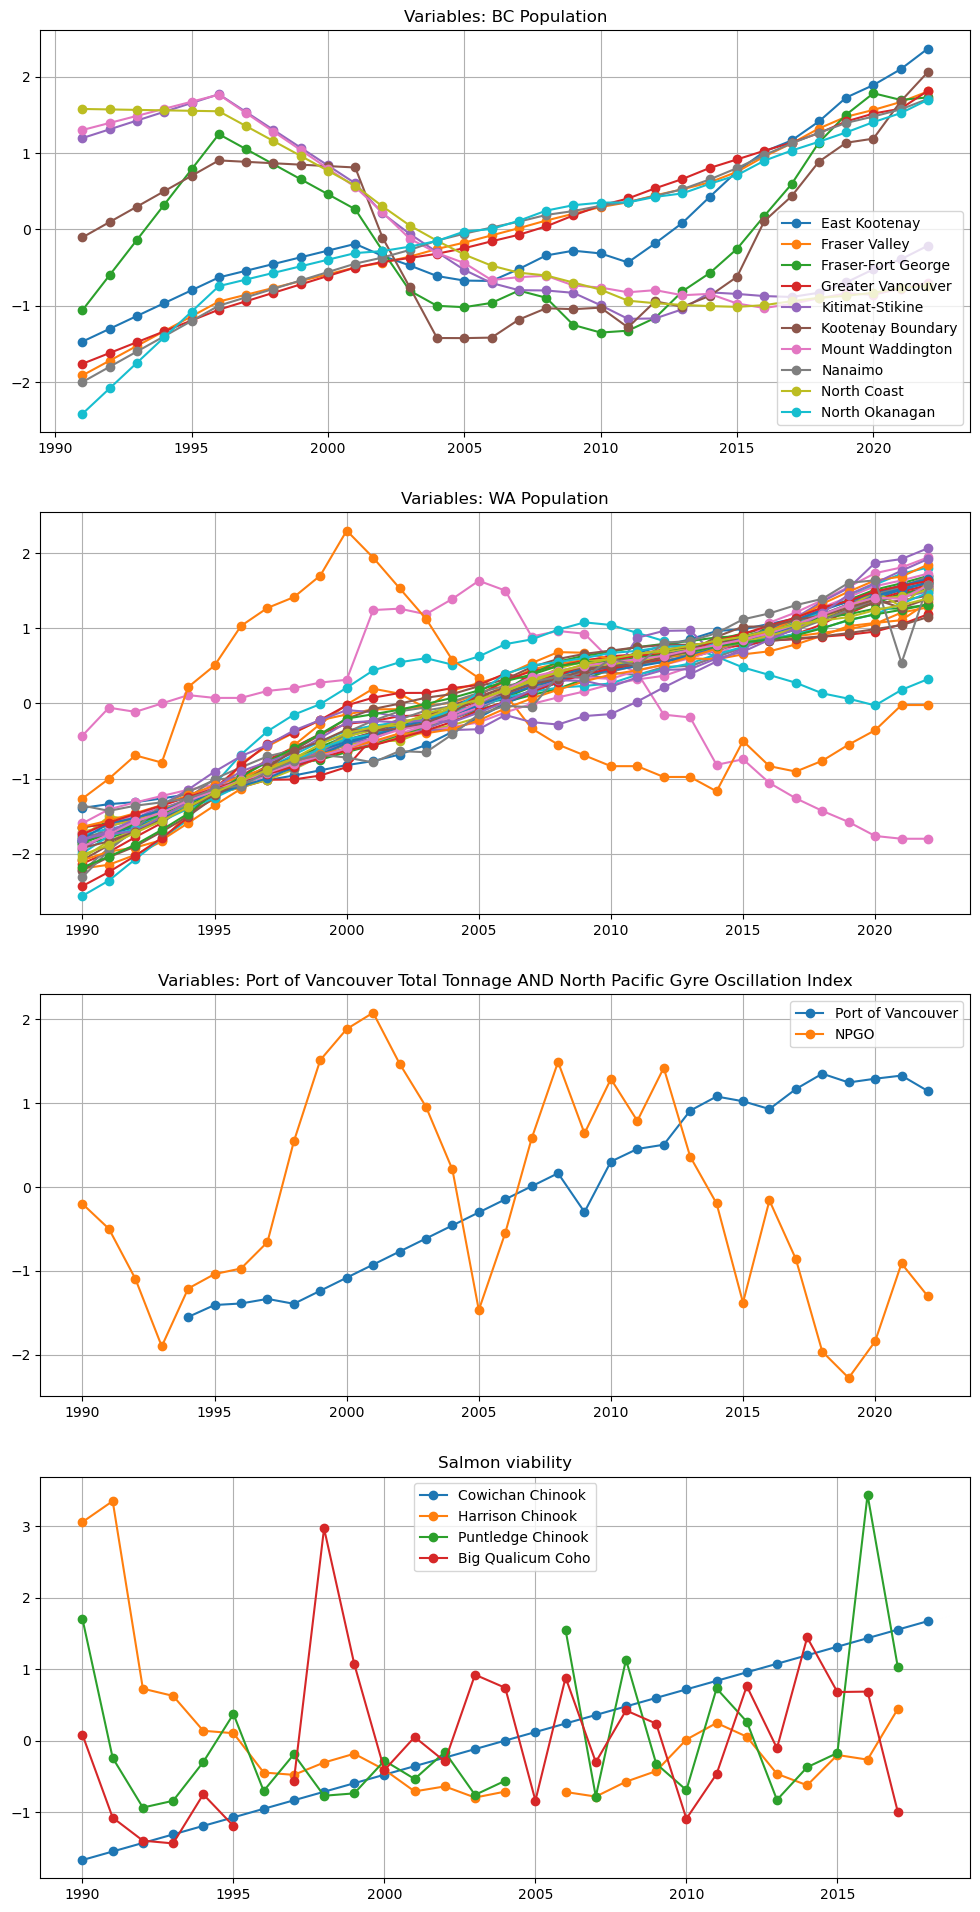

In [37]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (12,24))

#Plotting BC Regional District population vs Year
ax1.set_title("Variables: BC Population")

#ax1.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,2],marker = "o",label = BC_pop.columns[2])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,3],marker = "o",label = BC_pop.columns[3])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,5],marker = "o",label = BC_pop.columns[5])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,6],marker = "o",label = BC_pop.columns[6])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,7],marker = "o",label = BC_pop.columns[7])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,8],marker = "o",label = BC_pop.columns[8])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,9],marker = "o",label = BC_pop.columns[9])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,10],marker = "o",label = BC_pop.columns[10])

ax1.plot(time_wd,BC_pop_nrm.iloc[:,11],marker = "o",label = BC_pop.columns[11])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,12],marker = "o",label = BC_pop.columns[12])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,15],marker = "o",label = BC_pop.columns[15])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,17],marker = "o",label = BC_pop.columns[17])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,18],marker = "o",label = BC_pop.columns[18])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,19],marker = "o",label = BC_pop.columns[19])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,20],marker = "o",label = BC_pop.columns[20])

#ax1.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,22],marker = "o",label = BC_pop.columns[22])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,25],marker = "o",label = BC_pop.columns[25])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,28],marker = "o",label = BC_pop.columns[28])
#ax1.plot(time_wd,BC_pop_nrm.iloc[:,29],marker = "o",label = BC_pop.columns[29])

ax1.legend()
ax1.grid()


#Plotting WA County population vs Year
ax2.set_title("Variables: WA Population")

ax2.plot(time_wd,WA_pop_nrm.iloc[:,1],marker = "o",label = WA_pop_nrm.columns[1])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,2],marker = "o",label = WA_pop_nrm.columns[2])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,3],marker = "o",label = WA_pop_nrm.columns[3])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,4],marker = "o",label = WA_pop_nrm.columns[4])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,5],marker = "o",label = WA_pop_nrm.columns[5])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,6],marker = "o",label = WA_pop_nrm.columns[6])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,8],marker = "o",label = WA_pop_nrm.columns[8])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,9],marker = "o",label = WA_pop_nrm.columns[9])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])

ax2.plot(time_wd,WA_pop_nrm.iloc[:,11],marker = "o",label = WA_pop_nrm.columns[11])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,13],marker = "o",label = WA_pop_nrm.columns[13])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,14],marker = "o",label = WA_pop_nrm.columns[14])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,15],marker = "o",label = WA_pop_nrm.columns[15])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,16],marker = "o",label = WA_pop_nrm.columns[16])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,17],marker = "o",label = WA_pop_nrm.columns[17])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,18],marker = "o",label = WA_pop_nrm.columns[18])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,19],marker = "o",label = WA_pop_nrm.columns[19])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,20],marker = "o",label = WA_pop_nrm.columns[20])

ax2.plot(time_wd,WA_pop_nrm.iloc[:,21],marker = "o",label = WA_pop_nrm.columns[21])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,22],marker = "o",label = WA_pop_nrm.columns[22])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,23],marker = "o",label = WA_pop_nrm.columns[23])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,24],marker = "o",label = WA_pop_nrm.columns[24])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,25],marker = "o",label = WA_pop_nrm.columns[25])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,26],marker = "o",label = WA_pop_nrm.columns[26])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,27],marker = "o",label = WA_pop_nrm.columns[27])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,28],marker = "o",label = WA_pop_nrm.columns[28])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,29],marker = "o",label = WA_pop_nrm.columns[29])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,30],marker = "o",label = WA_pop_nrm.columns[30])

ax2.plot(time_wd,WA_pop_nrm.iloc[:,31],marker = "o",label = WA_pop_nrm.columns[31])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,32],marker = "o",label = WA_pop_nrm.columns[32])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,33],marker = "o",label = WA_pop_nrm.columns[33])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,34],marker = "o",label = WA_pop_nrm.columns[34])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,35],marker = "o",label = WA_pop_nrm.columns[35])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,36],marker = "o",label = WA_pop_nrm.columns[36])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,37],marker = "o",label = WA_pop_nrm.columns[37])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,38],marker = "o",label = WA_pop_nrm.columns[38])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,39],marker = "o",label = WA_pop_nrm.columns[39])

#ax2.legend()
ax2.grid()


#Plotting Port of Vancouver activity & NPGO vs Year
ax3.set_title("Variables: Port of Vancouver Total Tonnage AND North Pacific Gyre Oscillation Index")

ax3.plot(time_wd,Port_of_Van_nrm.iloc[:,1],marker = "o",label = 'Port of Vancouver')
ax3.plot(time_wd,NPGO.iloc[:,1],marker = "o",label = 'NPGO')

ax3.legend(loc = 'best')
ax3.grid()


#Plotting Salmon viability vs Year
ax4.set_title("Salmon viability")

ax4.plot(time_sal,Sal_viab_nrm.iloc[:,0],marker = "o",label = 'Cowichan Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,1],marker = "o",label = 'Harrison Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,2],marker = "o",label = 'Puntledge Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,3],marker = "o",label = 'Big Qualicum Coho')

ax4.legend(loc = 'best')
ax4.grid()

The BC population data appears to be much more variable than the WA population data overall.  

In BC, there appear to be two main trends: a group of Regional Districts appears to have a similar linearly increasing trend; while another group drops from mid-1990 peaks until the mid-2000s, and then increases in the late 2010s.  

In WA, the vast majority of Counties show a similar linearly increasing trend, but there are three outliers with noticable peaks in the early-to-mid 2000s and drops in the mid-to-late 2020s.

There is also some limited data on marine economic activity, from two sources.  This follows a similar trend to overall population growth, which is not surprising.  Superimposed on this is a climatological index called the North Pacific Gyre Oscillation.

In [38]:
import seaborn as sns

In [39]:
BC_pop_fix = BC_pop.reset_index().drop(columns=['index'])

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


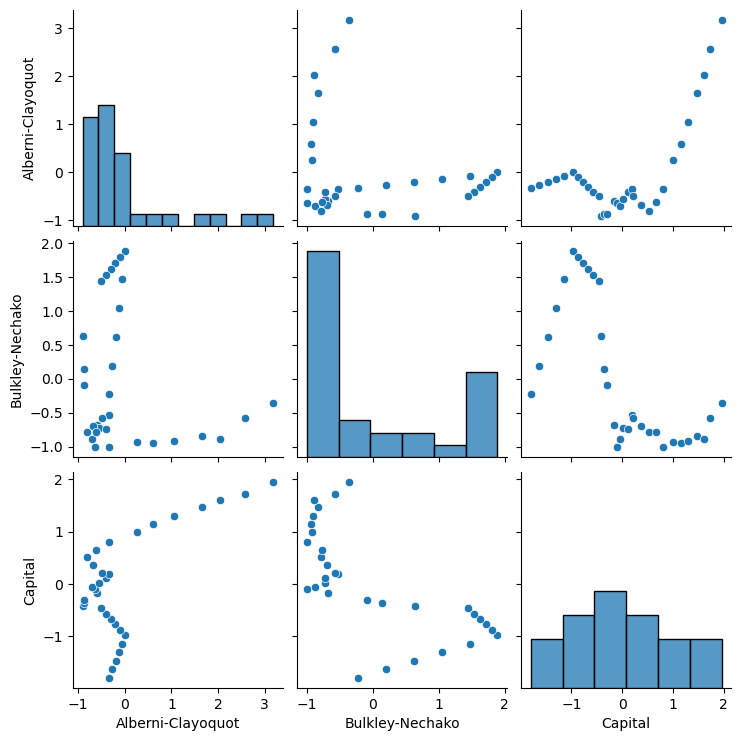

In [40]:
# a sample plot, only using some BC population variables
sns.pairplot(BC_pop_nrm[['Alberni-Clayoquot', 
                         'Bulkley-Nechako', 
                         'Capital']])

plt.show()

In [41]:
# pairplot for all BC population variables --- this takes a while!
sns.pairplot(BC_pop_fix[BC_pop_fix.columns[1:]])

plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [42]:
BC_pop_nrm.columns[1:]

Index(['Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital', 'Cariboo',
       'Central Coast', 'Central Kootenay', 'Central Okanagan',
       'Columbia-Shuswap', 'Comox Valley', 'Cowichan Valley', 'East Kootenay',
       'Fraser Valley', 'Fraser-Fort George', 'Greater Vancouver',
       'Kitimat-Stikine', 'Kootenay Boundary', 'Mount Waddington', 'Nanaimo',
       'North Coast', 'North Okanagan', 'Northern Rockies',
       'Okanagan-Similkameen', 'Peace River', 'Powell River',
       'Squamish-Lillooet', 'Stikine', 'Strathcona', 'Sunshine Coast',
       'Thompson-Nicola'],
      dtype='object')

In [43]:
row_list = [BC_pop_nrm.iloc[i][1:].tolist() + WA_pop_nrm.iloc[i][1:].tolist() + Port_of_Van_nrm.iloc[i][1:].tolist() + NPGO.iloc[i][1:].tolist() for i in range(1,4)]

In [44]:
col_list = BC_pop_nrm.columns.drop('Year').tolist() + WA_pop_nrm.columns.drop('Year').tolist() + Port_of_Van_nrm.columns.drop('Year').tolist() + NPGO.columns.drop('Year').tolist()

In [45]:
pd.DataFrame(row_list,columns=col_list)

,Alberni-Clayoquot,Bulkley-Nechako,Capital,Cariboo,Central Coast,Central Kootenay,Central Okanagan,Columbia-Shuswap,Comox Valley,Cowichan Valley,...,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima,Tonnage,NPGO index
0,-0.331918,-0.226151,-1.799184,-2.020052,NaN,-2.356439,-1.886199,-2.256495,-2.351402,-2.214012,...,-1.556527,-2.035817,-1.584496,-1.735641,-1.833517,-1.739668,-1.428585,-1.884325,NaN,-0.498915
1,-0.265562,0.196326,-1.635074,-1.944612,NaN,-1.961870,-1.726134,-1.893677,-2.061713,-1.931221,...,-1.459719,-1.879084,-1.469356,-1.701511,-1.706459,-1.568494,-1.360215,-1.719108,NaN,-1.094919
2,-0.199206,0.618803,-1.470965,-1.869173,NaN,-1.567300,-1.566068,-1.530860,-1.772023,-1.648431,...,-1.351629,-1.681324,-1.357336,-1.509142,-1.553710,-1.452228,-1.314961,-1.561700,NaN,-1.901993


In [46]:
Explore1 = pd.concat([Port_of_Van_nrm.drop(columns=['Year']),NPGO.drop(columns=['Year']), Sal_viab_nrm.drop(columns=['Year'])], axis=1)
Explore1

,Tonnage,NPGO index,Cowichan Chinook,Harrison Chinook,Puntledge Chinook,Big Qualicum Coho
0,NaN,-0.201546,3.061595,1.701229,0.079964,2.133155
1,NaN,-0.498915,3.354497,-0.243071,-1.079869,1.981901
2,NaN,-1.094919,0.726958,-0.938556,-1.401989,2.395259
3,NaN,-1.901993,0.625963,-0.843674,-1.440784,2.487728
4,-1.551164,-1.211599,0.137073,-0.301132,-0.753172,0.506193
5,-1.408692,-1.039209,0.103167,0.372133,-1.196327,-0.170962
6,-1.390426,-0.972837,-0.447456,-0.705317,NaN,-0.258512
7,-1.335629,-0.657691,-0.480478,-0.192919,-0.562173,-0.761939
8,-1.394079,0.544553,-0.307594,-0.772848,2.971928,-0.318714
9,-1.238230,1.515781,-0.184656,-0.739744,1.072551,-0.331203


/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


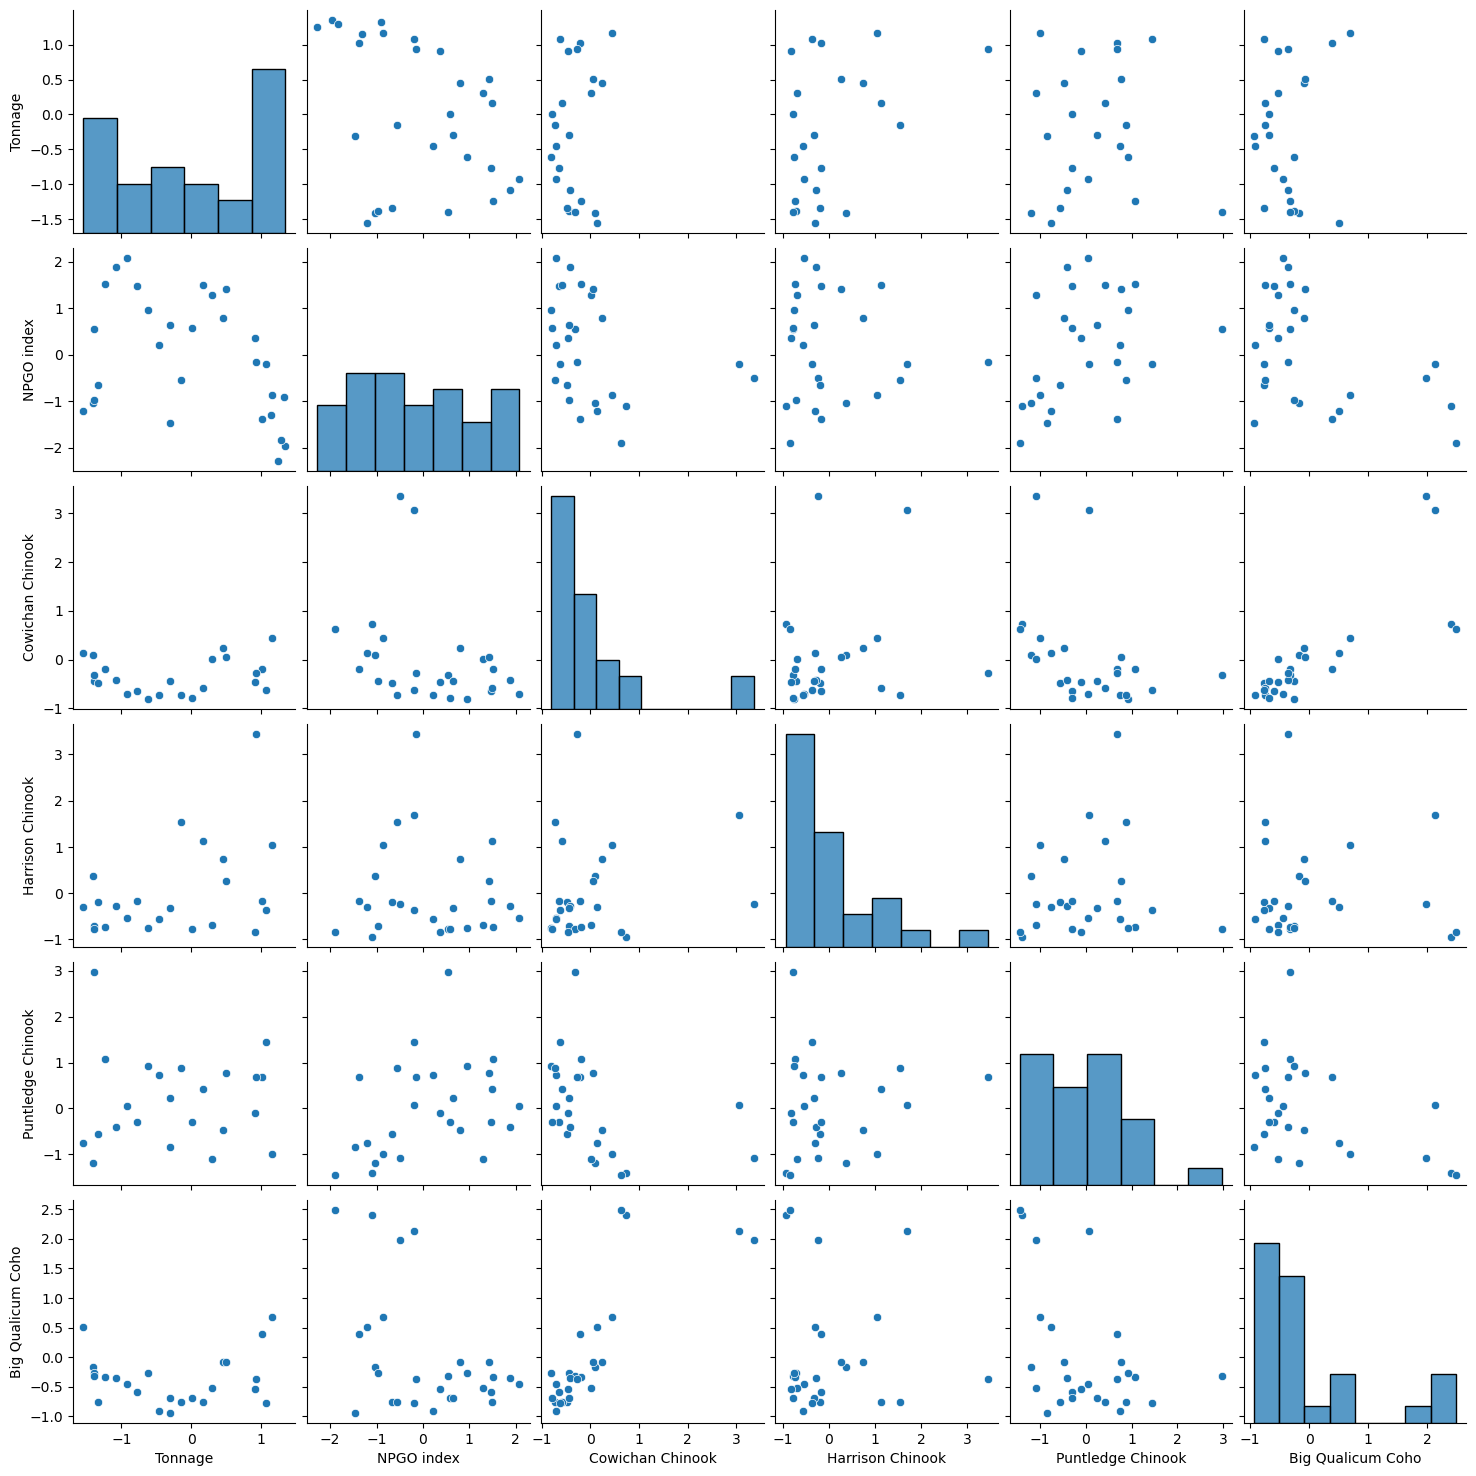

In [47]:
sns.pairplot(Explore1[Explore1.columns])

plt.show()